In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import category_encoders as ce

In [31]:
#importing the data
data = pd.read_csv("https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv")
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
x

<bound method DataFrame.to_numpy of     R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       

In [13]:
cities = data['State'].values

In [15]:
set(cities)

{'California', 'Florida', 'New York'}

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [34]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [35]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [41]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

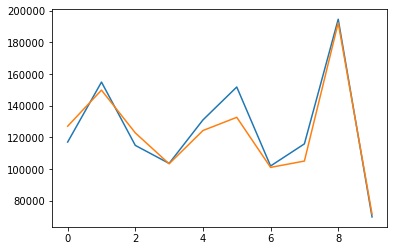

In [47]:
plt.plot(y_pred)
plt.plot(y_test)

In [50]:
y_pred

array([117010.96, 154848.76, 114886.27, 103525.44, 130953.09, 151732.74,
       101903.  , 115846.96, 194490.34,  69758.87])

In [49]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[117010.96 126992.93]
 [154848.76 149759.96]
 [114886.27 122776.86]
 [103525.44 103282.38]
 [130953.09 124266.9 ]
 [151732.74 132602.65]
 [101903.   101004.64]
 [115846.96 105008.31]
 [194490.34 192261.83]
 [ 69758.87  71498.49]]


Text(0, 0.5, 'Predicted')

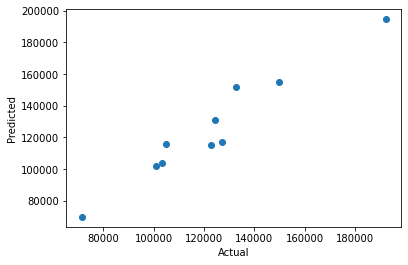

In [59]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel("Predicted")

In [60]:
pred_df = pd.DataFrame({'Actual Value':y_test,"Predicted Value":y_pred,"Difference":(y_test-y_pred)})
pred_df

,Actual Value,Predicted Value,Difference
0,126992.93,117010.961327,9981.968673
1,149759.96,154848.760941,-5088.800941
2,122776.86,114886.266855,7890.593145
3,103282.38,103525.442667,-243.062667
4,124266.90,130953.087827,-6686.187827
5,132602.65,151732.739496,-19130.089496
6,101004.64,101903.001901,-898.361901
7,105008.31,115846.962155,-10838.652155
8,192261.83,194490.344128,-2228.514128
9,71498.49,69758.871355,1739.618645


In [68]:
#evaluatiomn of model
sc = r2_score(y_test,y_pred)
print(sc)

0.9234780730664319
